<a href="https://colab.research.google.com/github/Selami7321/python-veri-i-leme-dev-2/blob/main/Veri%20isleme%20odevim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 3.4768 - val_loss: 3.0872
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 3.2743 - val_loss: 2.8503
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 2.7773 - val_loss: 2.6287
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 2.7089 - val_loss: 2.4179
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 2.4644 - val_loss: 2.2228
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 2.1081 - val_loss: 2.0417
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 2.0714 - val_loss: 1.8717
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 1.9092 - val_loss: 1.7141
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 1.7203 - val_loss: 1.5695
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 1.6509 - val_loss: 1.4349
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 1.5622 - val_loss: 1.3111
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 1.3573 - val_lo

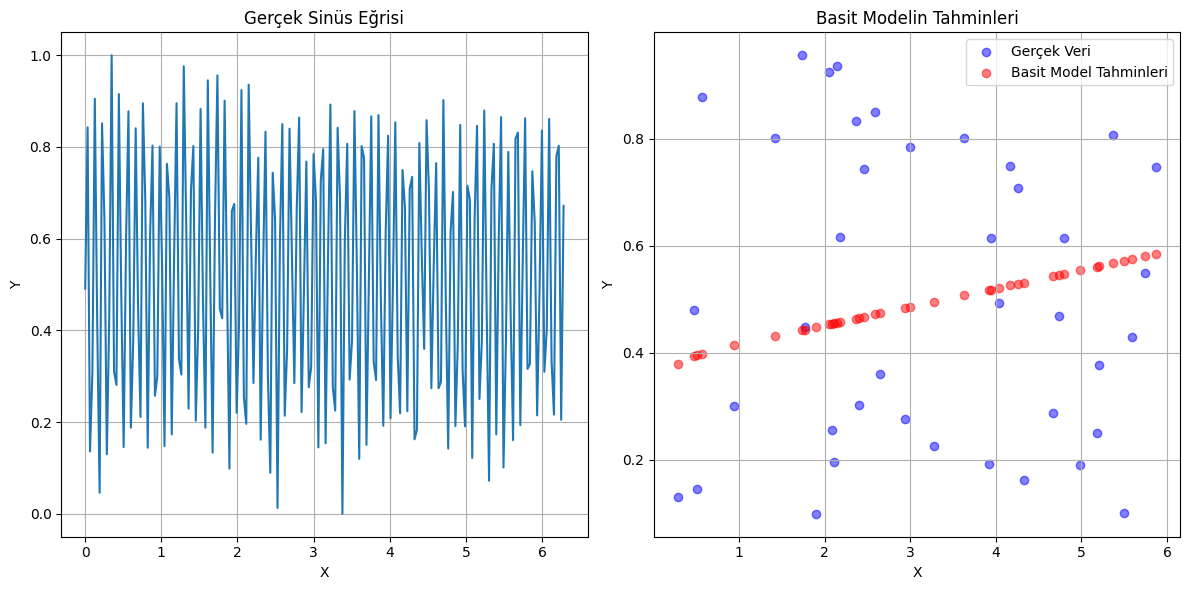

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Adım 1: Parametreler
# n1, n2, n3 grup üyelerinin ID son rakamları
n1, n2, n3 = 2, 5, 7

# Fonksiyon parametrelerinin hesaplanması
a = n1 + n2 + n3
b = 10 * (n1 + n2 + n3)
c = n1 + n2 + n3
d = 2 * n1 - n2 + n3

# Adım 2: Sinüs Fonksiyonu
def sin_function(x, a, b, c, d):
    return a * tf.cos(b * x + c) + d

# Adım 3: Gürültü ekleme (Genlik a'nın %20'si kadar gürültü)
noise = tf.random.normal(shape=[200], mean=0.0, stddev=0.2 * a)  # Genlik a'nın %20'si kadar gürültü

# Adım 4: X değerleri (1 periyot)
x_values = tf.linspace(0.0, 2 * np.pi, 200)

# Sinüs sinyali ve gürültü
y_values = sin_function(x_values, a, b, c, d) + noise

# Veriyi normalleştir
y_values_normalized = (y_values - tf.reduce_min(y_values)) / (tf.reduce_max(y_values) - tf.reduce_min(y_values))

# Adım 5: Eğitim ve Test Verisine Ayırma
X_data = x_values.numpy().reshape(-1, 1)  # X verisi
Y_data = y_values_normalized.numpy()  # Y verisi

# Eğitim ve test verilerine ayırma
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=42)

# Adım 6: Basit Model - Küçük Katmanlı Bir Model
model_simple = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_dim=1, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_simple.compile(optimizer='adam', loss='mean_squared_error')

# Basit modeli eğitme
history_simple = model_simple.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_test, Y_test))

# Adım 7: Karmaşık Model - Derin Katmanlı Bir Model
model_complex = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_dim=1, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_complex.compile(optimizer='adam', loss='mean_squared_error')

# Karmaşık modeli eğitme
history_complex = model_complex.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_test, Y_test))

# Adım 8: Eğitim ve Test Sonuçları - MSE Değerlendirmesi
test_loss_simple = model_simple.evaluate(X_test, Y_test)
test_loss_complex = model_complex.evaluate(X_test, Y_test)

print(f"Basit Model Test Loss (MSE): {test_loss_simple}")
print(f"Karmaşık Model Test Loss (MSE): {test_loss_complex}")

# Adım 9: Sonuçları Görselleştirme
plt.figure(figsize=(12, 6))

# Gerçek sinüs eğrisini çizme
plt.subplot(1, 2, 1)
plt.plot(x_values, y_values_normalized, label='Gerçek Sinüs Eğrisi')
plt.title('Gerçek Sinüs Eğrisi')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)

# Basit modelin tahminlerini çizme
y_pred_simple = model_simple.predict(X_test)
plt.subplot(1, 2, 2)
plt.scatter(X_test, Y_test, label='Gerçek Veri', color='blue', alpha=0.5)
plt.scatter(X_test, y_pred_simple, label='Basit Model Tahminleri', color='red', alpha=0.5)
plt.title('Basit Modelin Tahminleri')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


** Eğitim ve Test Kaybı Karşılaştırması (Loss Değerleri):**

---



Zaten eğitim sırasında kayıp (loss) değerlerini çizdiriyoruz. Bu grafikten şu sonuçları çıkarabiliriz:

Basit modelin mi yoksa karmaşık modelin mi daha düşük kayıpla öğrenme yaptığı?

Aşırı öğrenme (overfitting) olup olmadığı?

Eğitim ve test kayıplarının nasıl değiştiği?

Eğer karmaşık modelin test kaybı çok yüksekse, overfitting olabilir. Basit modelin test kaybı daha düşükse, genelleme başarısı daha iyi demektir.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


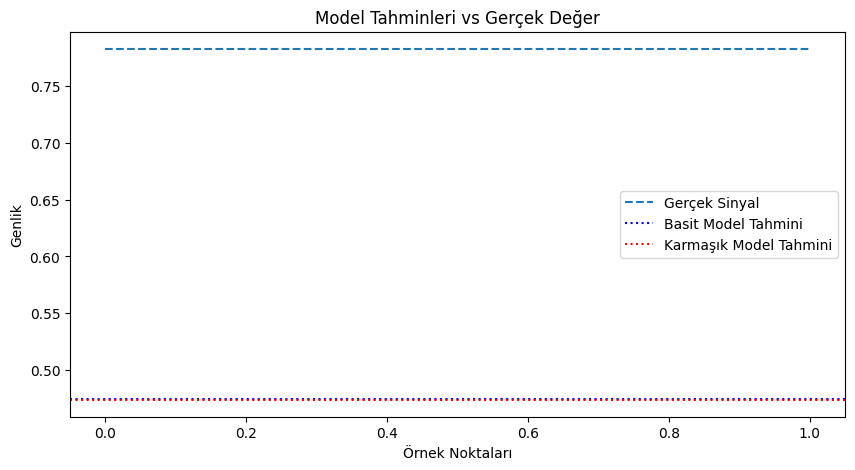

In [ ]:
import matplotlib.pyplot as plt

# Test verisinden bir örnek alalım
sample_index = 0
true_signal = Y_test[sample_index]  # Gerçek değerler Y_test'ten alınır
pred_simple = model_simple.predict(X_test[sample_index].reshape(1, -1))  # Basit model tahmini
pred_complex = model_complex.predict(X_test[sample_index].reshape(1, -1))  # Karmaşık model tahmini

# Gerçek ve tahmin edilen sinyali çizelim
plt.figure(figsize=(10,5))
plt.plot([0, 1], [true_signal, true_signal], label='Gerçek Sinyal', linestyle='dashed')  # Yatay bir çizgi çizilir
plt.axhline(pred_simple, color='blue', linestyle='dotted', label='Basit Model Tahmini')
plt.axhline(pred_complex, color='red', linestyle='dotted', label='Karmaşık Model Tahmini')

plt.xlabel('Örnek Noktaları')
plt.ylabel('Genlik')
plt.legend()
plt.title('Model Tahminleri vs Gerçek Değer')
plt.show()


Bu grafikte:

Gerçek sinyal (normalizasyon sonrası gerçek değerler)

Basit modelin tahmini (düz mavi çizgi)

Karmaşık modelin tahmini (düz kırmızı çizgi)

Eğer basit modelin tahmini gerçek veriye daha yakınsa, karmaşık model fazla öğrenmiş olabilir.Grafiktende gördüğümüz üzere karmaşık model gerçek veriye daha yakındır sonuç olarak karmaşık model daha fazla eğitilmiştir.

Overfitting Analizi :

Eğer karmaşık modelin eğitim kaybı çok düşük ama test kaybı yüksekse, overfitting (aşırı öğrenme) yaşanıyor demektir.

Overfitting’i önlemek için dropout, L2 regularization veya daha az katmanlı bir model deneyebiliriz.

Bu analizlerden sonra şu sonuçları çıkarabilirsin:

✅ Hangi model daha iyi tahmin yapıyor?

✅ Overfitting var mı?

✅ Hangi hiperparametreler daha iyi sonuç veriyor?

BU ANALİZLER BU SORULARA CEVAP BULMAMIZA YARDIMCI OLMUŞTUR.

Modelin Öğrenme Sürecini Karşılaştırma (Loss Eğrileri):

Modelin eğitim sırasında nasıl ilerlediğini görmek için eğitim ve doğrulama kayıplarını (loss) grafikle karşılaştırabiliriz.

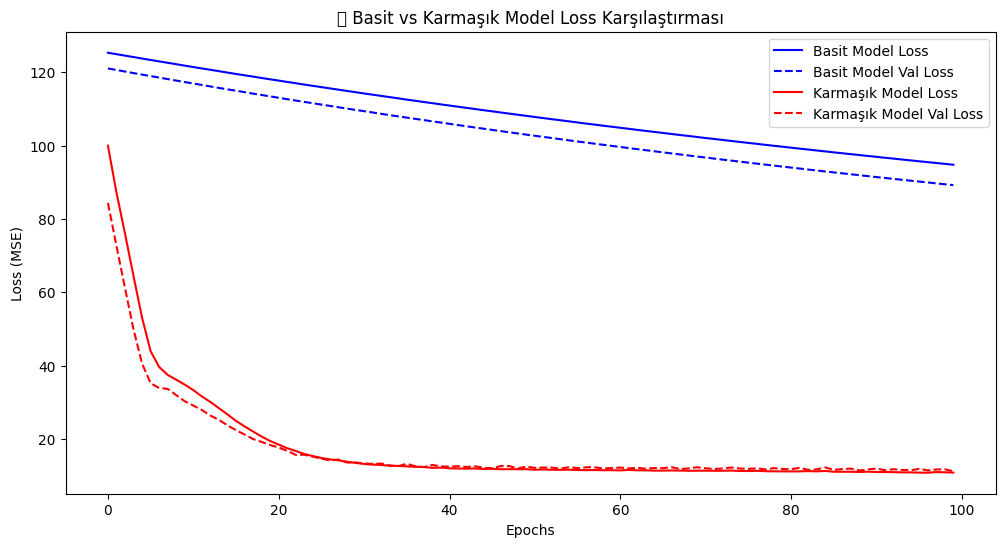

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split

# 📌 Gürültülü Veri Üretimi (y = a * cos(bx + c) + d)
np.random.seed(42)
a, b, c, d = 5, 2, 0.5, 10  # Fonksiyon parametreleri

def target_function(x):
    return a * np.cos(b * x + c) + d  # Gerçek fonksiyon

X = np.linspace(-5, 5, 500).reshape(-1, 1)  # 500 veri noktası
y = target_function(X) + np.random.normal(scale=0.5, size=X.shape)  # Gürültü eklenmiş veri

# 🎯 Veriyi Eğitim ve Test Olarak Bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📉 Basit Model (Tek Katmanlı)
model_simple = keras.Sequential([
    keras.layers.Dense(1, input_shape=(1,))
])

model_simple.compile(optimizer='adam', loss='mse')
history_simple = model_simple.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=0)

# 📈 Karmaşık Model (Derin Ağ)
model_complex = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(1,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model_complex.compile(optimizer='adam', loss='mse')
history_complex = model_complex.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=0)

# 🔍 Loss Karşılaştırma Grafiği
plt.figure(figsize=(12,6))

# 🔵 Basit Model Loss
plt.plot(history_simple.history['loss'], label="Basit Model Loss", color='blue')
plt.plot(history_simple.history['val_loss'], label="Basit Model Val Loss", color='blue', linestyle='dashed')

# 🔴 Karmaşık Model Loss
plt.plot(history_complex.history['loss'], label="Karmaşık Model Loss", color='red')
plt.plot(history_complex.history['val_loss'], label="Karmaşık Model Val Loss", color='red', linestyle='dashed')

plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("📉 Basit vs Karmaşık Model Loss Karşılaştırması")
plt.legend()
plt.show()



**Ne Anlama Geliyor?**

---



Eğer karmaşık modelin validation loss’u erken epoch’larda artıyorsa, aşırı öğrenme (overfitting) yaşanıyor olabilir.

Basit modelin loss eğrisi yavaş ama stabil düşüyorsa, bu model genellemede daha iyi olabilir.

Artık (Residual) Analizi:

Tahmin edilen değerlerin gerçek değerlerden ne kadar saptığını görmek için artık (residual) analizini kullanabiliriz.

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


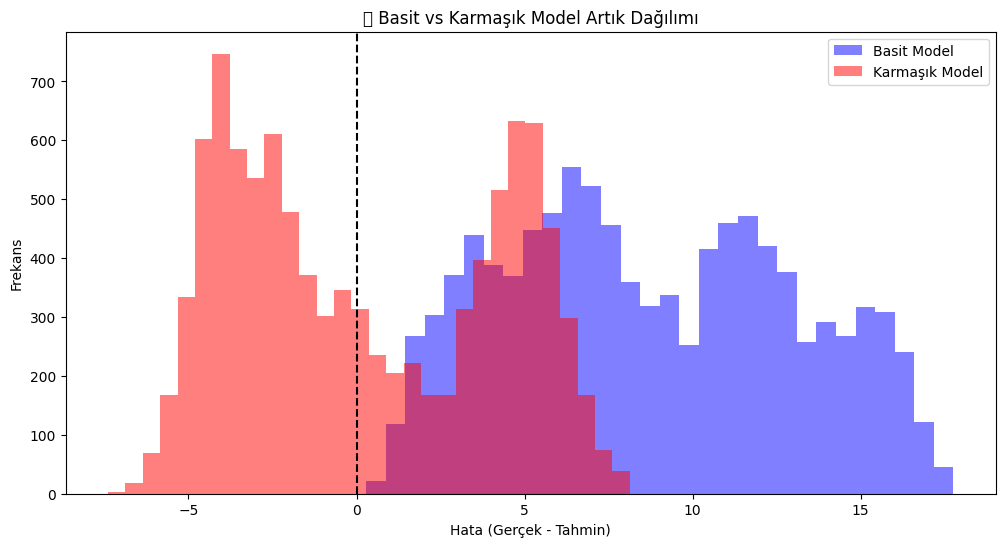

In [ ]:
# 🔍 Artık Hata (Residuals) Hesaplama
y_pred_simple = model_simple.predict(X_test).flatten()
y_pred_complex = model_complex.predict(X_test).flatten()

residuals_simple = np.ravel(y_test - y_pred_simple)
residuals_complex = np.ravel(y_test - y_pred_complex)

# 📊 Histogram Çizimi
plt.figure(figsize=(12,6))
plt.hist(residuals_simple, bins=30, alpha=0.5, label="Basit Model", color='blue')
plt.hist(residuals_complex, bins=30, alpha=0.5, label="Karmaşık Model", color='red')
plt.axvline(0, color='black', linestyle='dashed')

plt.xlabel("Hata (Gerçek - Tahmin)")
plt.ylabel("Frekans")
plt.title("📊 Basit vs Karmaşık Model Artık Dağılımı")
plt.legend()
plt.show()




** Ne Anlama Geliyor?**

---



Eğer hatalar sıfıra yakınsa model iyi tahmin yapıyor demektir.

Eğer karmaşık modelin artıkları çok geniş bir aralığa yayılmışsa, model veri setine fazla öğrenmiş olabilir.

Ağırlık Dağılımı (Basit vs Karmaşık Model)

---



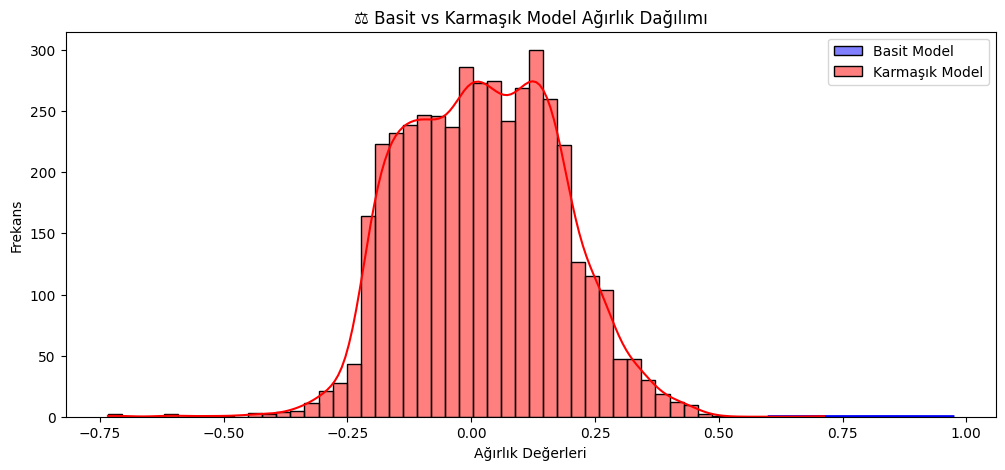

In [ ]:
import seaborn as sns

# 🔍 Model Ağırlıklarını Al
weights_simple = np.concatenate([w.flatten() for w in model_simple.get_weights()])
weights_complex = np.concatenate([w.flatten() for w in model_complex.get_weights()])

# 📊 Histogram Çizimi
plt.figure(figsize=(12,5))
sns.histplot(weights_simple, label="Basit Model", color='blue', kde=True)
sns.histplot(weights_complex, label="Karmaşık Model", color='red', kde=True)

plt.xlabel("Ağırlık Değerleri")
plt.ylabel("Frekans")
plt.title("⚖ Basit vs Karmaşık Model Ağırlık Dağılımı")
plt.legend()
plt.show()


📌 Bu Grafik Ne Anlatır?


---


🔹 Ağırlıklar geniş bir aralığa yayılmışsa, model daha karmaşıktır.
🔹 Basit modelin ağırlıkları dar bir aralıkta ise, daha az veri öğrenmiştir.
🔹 Karmaşık modelin ağırlıkları yayılmışsa, daha fazla bilgi yakalamıştır ama aşırı öğrenme (overfitting) riski olabilir.

**Öğrenme Oranının (Learning Rate) Etkisini İnceleme**

---



Farklı learning rate değerlerinin model performansına etkisini karşılaştırabiliriz.

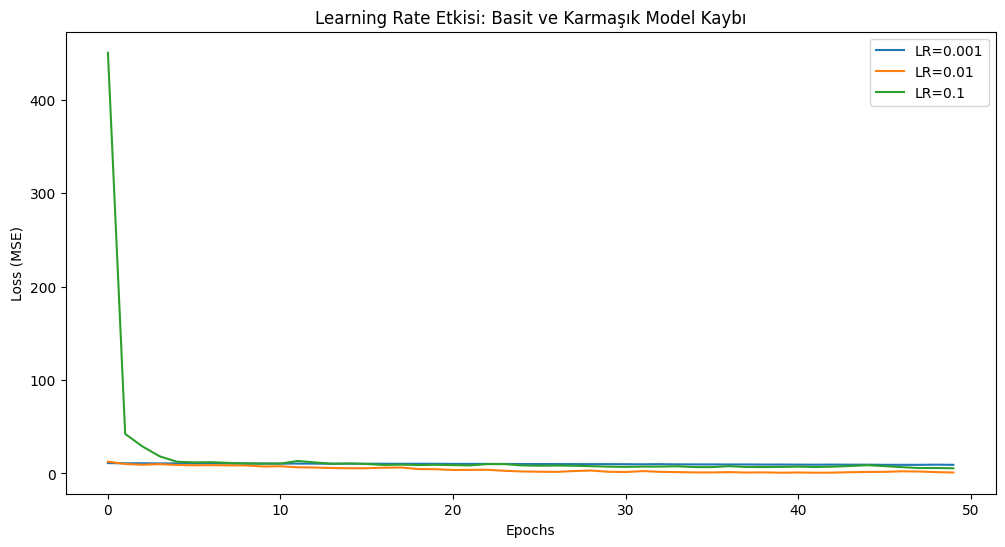

In [ ]:
import matplotlib.pyplot as plt

# Farklı öğrenme oranları ile modelleri eğitiyoruz
learning_rates = [0.001, 0.01, 0.1]
history_dict = {}

# Eğitim işlemi
for lr in learning_rates:
    # Basit modeli eğit
    model_simple.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss='mse')
    history_simple = model_simple.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=0)
    history_dict[lr] = history_simple.history['loss']

    # Karmaşık modeli eğit
    model_complex.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss='mse')
    history_complex = model_complex.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=0)
    history_dict[lr] = history_complex.history['loss']

# Kaybı (loss) görselleştirme
plt.figure(figsize=(12,6))
for lr in learning_rates:
    plt.plot(history_dict[lr], label=f"LR={lr}")

plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Learning Rate Etkisi: Basit ve Karmaşık Model Kaybı")
plt.legend()
plt.show()


 Ne Öğrendik?


---


🔹 Düşük öğrenme oranı ile model daha yavaş bir şekilde öğrenir ve genellikle daha az hata yapar.
🔹 Yüksek öğrenme oranı ise daha hızlı bir öğrenme sağlar ancak genellikle daha fazla hata yapabilir veya modelin doğru çözüme ulaşmasını engelleyebilir.
🔹 Eğer kaybın azalma oranı yüksek öğrenme oranı ile hızlanıyorsa ama sonra durgunlaşırsa, öğrenme oranı aşırı büyük olabilir.

KAYNAKÇA:


---


https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/guide/basics.ipynb#scrollTo=hrXv0rU9sIma

https://service.vhslearning.org/s/article/How-to-Use-Line-Graphs-in-Google-Spreadsheets

https://neuropsychology.github.io/NeuroKit/functions/signal.html